In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from random import gauss
from random import random
from numpy.linalg import inv
!pip install pyunfold
from pyunfold import iterative_unfold
from pyunfold.callbacks import Logger
import matplotlib.cm as cm
import scipy as sp

# Response, Unfolding & Convolution

## Convolution

A convolution is an operation that takes place on two functions, $f$ and $g$, producing a third function $f * g$:
$$(f * g)(t) = \int_{-\infty}^{\infty} f(\tau) g(t-\tau) d\tau$$
Intuitively, this involves flipping one of the functions and sliding it past the other.  The value of the convlution at a particular point is then the integral of the overlap of the two functions.

![](https://drive.google.com/uc?export=view&id=1olgQ6PWsmguah8NHyilyVK3R9Sl4nt6Q) (image from wikipedia)

There are a few properties of convolutions that are useful to know:
- $(f * g) = (g *f)$, communtativity
- $f * (g * h) =  (f * g) * h$, associativity
- $f * (g + h) = f * g + f * h$, distributivity
- $ f * \delta = f$

Convolutions show up in lots of places, particularly signal processing, responses, physics, etc.  This is what is going on in kernel density estimation as well (from earlier in the semester).

Of course there are multiple implementations of convolutions in python (we'll use the scipy one) but it is easy to lose intuition of what's going on without working through some simple examples.  (Due to the [Convolution Theorem](https://en.wikipedia.org/wiki/Convolution_theorem) most implementations of
convolutions in software employ FFT because the convolution of two functions is the product of their Fourier transforms.)

Here's a simple way to think abou a discrete convolution.  Let's say that we have $f = [1 2 3 4]$ and $g = [1 2]$.  In order to evaluate the convolution, we flip $g$ and slide it across $f$.  At each step, we
take the product of the element of $f$ and the element of $g$ that are lined up.  Those elements are summed together to create an element of the convolution.
![](https://drive.google.com/uc?export=view&id=1BBxKcLTPmZh1gWmS68dJUY9_eDZOxOmg)



Let's verify that this is the same as one gets using scipy's convolution function...

In [ ]:
from scipy import signal
sig = ([1,2,3,4])
win = ([1,2])

convolution = signal.convolve(sig, win, mode='full')
print(convolution)


[ 1  4  7 10  8]


This looks like it perhaps should be related to matrix multiplication and it is.  If you take one (it shouldn't matter which) of the functions and convert it into a [Toepliz matrix](https://en.wikipedia.org/wiki/Toeplitz_matrix) and multiply that times the other function you get the same answer.  ADD THE LATEX MATRIX MULTIPLICATION!!!!!!

Now we can more over to more complicated functions.  Here is a $\delta$ function convoluted with a Gaussian.

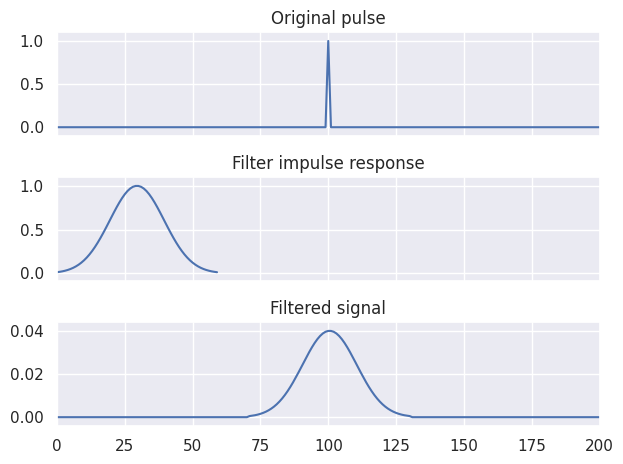

In [ ]:
sig = np.repeat([0],100)
sig = np.append(sig,np.repeat([1],1))
sig = np.append(sig,np.repeat([0],100))
win = signal.windows.gaussian(60,10,)
filtered = signal.convolve(sig, win, mode='same') / sum(win)

fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('kernel')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('convolution')
ax_filt.margins(0, 0.1)
fig.tight_layout()


Broadening this out to a wider flat distribution...

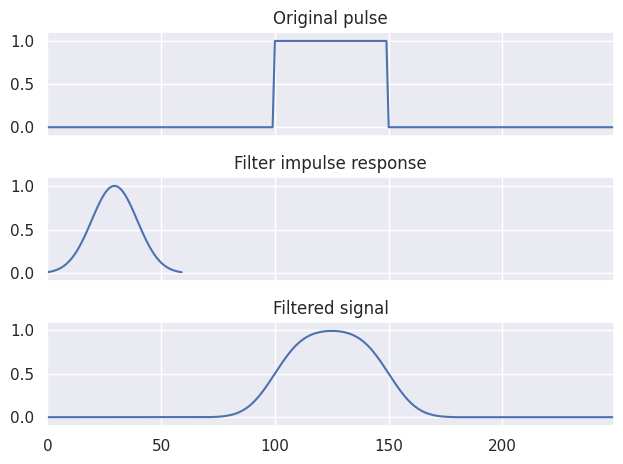

In [ ]:
sig = np.repeat([0],100)
sig = np.append(sig,np.repeat([1],50))
sig = np.append(sig,np.repeat([0],100))

win = signal.windows.gaussian(60,10,)

filtered = signal.convolve(sig, win, mode='same') / sum(win)

fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()


And an even wider pulse...

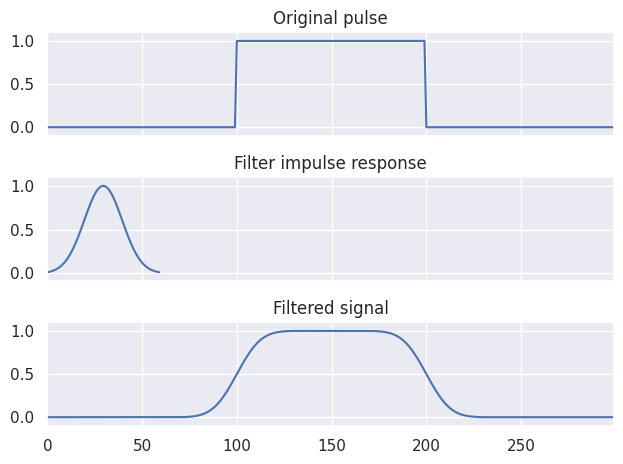

In [ ]:
sig = np.repeat([0],100)
sig = np.append(sig,np.repeat([1],50))
sig = np.append(sig,np.repeat([0],100))
win = signal.windows.gaussian(60,10,)


filtered = signal.convolve(sig, win, mode='same') / sum(win)
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

And something that stair-steps...

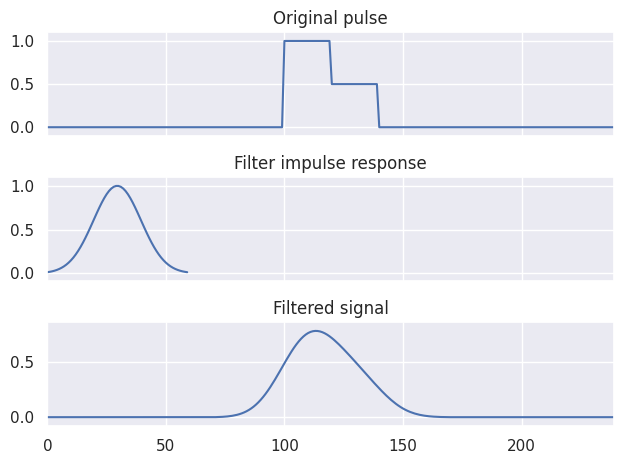

In [ ]:
sig = np.repeat([0],100)
sig = np.append(sig,np.repeat([1],20))
sig = np.append(sig,np.repeat([0.5],20))
sig = np.append(sig,np.repeat([0],100))
win = signal.windows.gaussian(60,10,)


filtered = signal.convolve(sig, win, mode='same') / sum(win)
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

It's worth knowing that a Gaussian convoluted with a Gaussian remains a Gaussian.

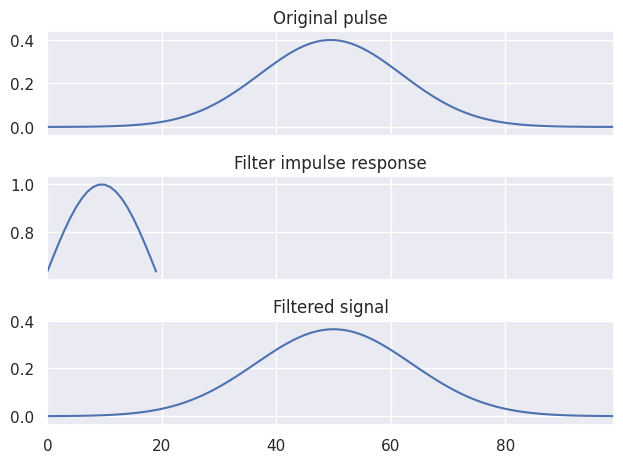

In [ ]:
import scipy.stats as stats
x = np.linspace(-4, 4, 100)
mean = 0
std_dev = 1
sig = stats.norm.pdf(x, mean, std_dev)
win = signal.windows.gaussian(20,10,)


filtered = signal.convolve(sig, win, mode='same') / sum(win)
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

We saw that convolving something with sharp edges with a Gaussian smooths out the edges, as we expect.  One use for this is in image processing.  Here we'll create a 2D Gaussian and blur an image.

In [ ]:
import os.path
import subprocess

def wget_data(url):
    local_path='./'
    subprocess.run(["wget", "-nc", "-P", local_path, url])


In [ ]:
def locate_data(name, check_exists=True):
    local_path='./'
    path = os.path.join(local_path, name)
    if check_exists and not os.path.exists(path):
        raise RuxntimeError('No such data file: {}'.format(path))
    return path

In [ ]:
wget_data('https://raw.githubusercontent.com/illinois-dap/DataAnalysisForPhysicists/refs/heads/main/data/belt.png')
locate_data('belt.png')

'./belt.png'

Just pulling out a graph from a couple of weeks ago to blur....

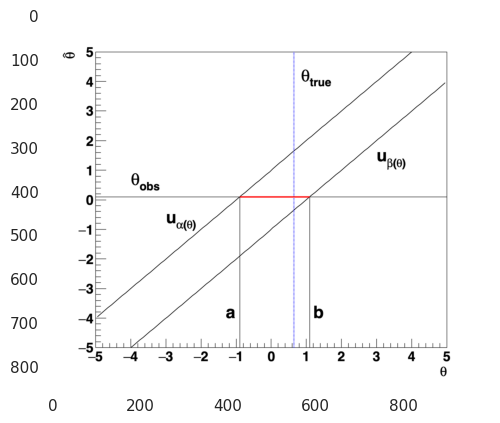

In [ ]:
img = plt.imread("./belt.png")
plt.figure()
plt.grid(False)
plt.imshow(img)

/tmp/ipython-input-1105851289.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower center')


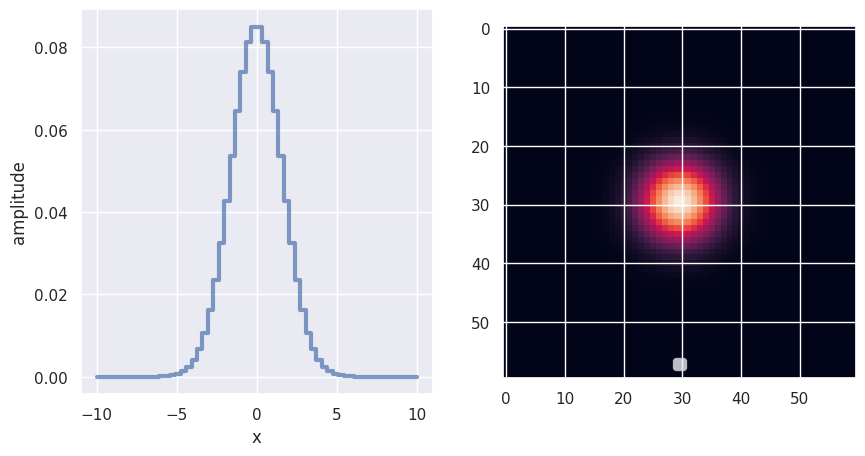

In [ ]:
t = np.linspace(-10, 10, 60)
sigma2 = 5 # defines the width of the Gaussian...
bump = np.exp(- t**2 /sigma2)
bump /= np.sum(bump)
kernel = bump[:, np.newaxis] * bump[np.newaxis, :] #2D
fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].step(t, bump, where='mid', lw=3,
        alpha=0.7)
ax[0].set(xlabel='x', ylabel='amplitude')

ax[1].imshow(kernel)
plt.legend(loc='lower center')
plt.show()
#print(kernel)

And now we convolve the image with our kernel.... (test for yourself that changing the width changes the degree of blurring).

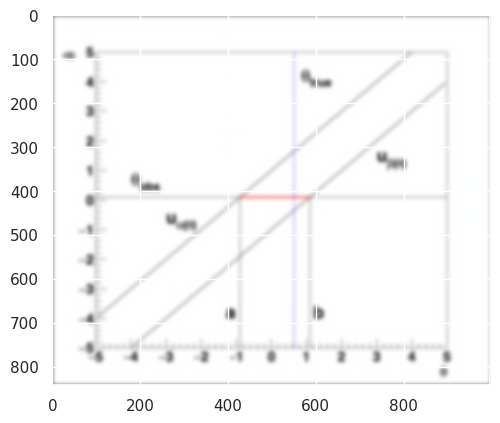

In [ ]:
img3 = sp.signal.convolve(img, kernel[:, :, np.newaxis], mode="same")
plt.figure()
plt.imshow(img3)

## Response

Measurement can be thought of as convolution of reality with the kernel defined by the detector.  This kernel is called the detector response.